# Phase 1 : Exploration et Prétraitement des Données (EDA)

In [6]:
# Cloner le dépôt GitHub dans l'environnement Colab
!git clone https://github.com/M-Carre/OC.git

Cloning into 'OC'...


On commence par les importations.

In [7]:
# Manipulation de données
import pandas as pd
import numpy as np

# Traitement de texte (sera utilisé plus tard pour le prétraitement)
import nltk
import re # Pour les expressions régulières (utile pour le nettoyage)

# Visualisation (utile pour l'Analyse Exploratoire des Données - EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Utilitaires Scikit-learn (pour la division des données, métriques, etc.)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Configuration pour les visualisations (optionnel mais améliore le rendu)
sns.set_theme(style="whitegrid")

print("Bibliothèques de base importées.")
# Note : MLflow, TensorFlow/Keras, PyTorch, Transformers seront importés/installés plus tard
# Note : NLTK pourrait nécessiter un téléchargement de données (ex: nltk.download('stopwords'))

Bibliothèques de base importées.


On charge ensuite les données.

In [11]:
# Accédez au contenu du drive depuis le notebook
from google.colab import drive
drive.mount('/content/drive')

# Définition du chemin d'accès
file_path = '/content/drive/MyDrive/Colab Notebooks/OC/P7/training.1600000.processed.noemoticon.csv'

# Définir les noms de colonnes car le fichier n'a pas d'en-tête
column_names = ['target', 'id', 'date', 'flag', 'user', 'text']

# Charger le dataset
df = pd.read_csv(
    file_path,
    encoding='ISO-8859-1', # ou 'latin1'
    header=None,
    names=column_names
)

# Afficher les 5 premières lignes et la forme du DataFrame pour vérifier
print(f"Dataset chargé. Forme : {df.shape}")
print(display(df.head()))

Dataset chargé. Forme : (1600000, 6)


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


None


Les données ont bien été importées.
On a la target 0 qui correspond à des commentaires négatifs situés dans la colonne text et le 4 qui correspond à des commentaires positifs.

Commençons par quelques vérifications fondamentales :

- Informations Générales et Types de Données

- Valeurs Manquantes

- Distribution de la Cible

Informations Générales sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Nombre de valeurs manquantes par colonne:
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


Distribution de la variable 'target':
target
0    800000
4    800000
Name: count, dtype: int64


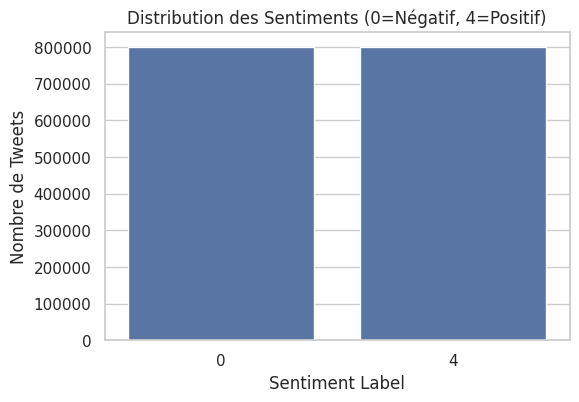

In [12]:
# 1. Informations Générales et Types de Données
print("Informations Générales sur le DataFrame:")
df.info()

print("\n" + "="*50 + "\n") # Séparateur visuel

# 2. Vérification des Valeurs Manquantes
print("Nombre de valeurs manquantes par colonne:")
print(df.isnull().sum())

print("\n" + "="*50 + "\n") # Séparateur visuel

# 3. Distribution de la variable cible 'target'
print("Distribution de la variable 'target':")
print(df['target'].value_counts())

# Visualisation de la distribution de la cible
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution des Sentiments (0=Négatif, 4=Positif)')
plt.xlabel('Sentiment Label')
plt.ylabel('Nombre de Tweets')
plt.show()

**Résultats :**

- **Pas de valeurs manquantes**

- Types de données : Les **colonnes sont correctement lues**, bien que date soit un object (chaîne de caractères). Pour notre objectif d'analyse de sentiment basée sur le text, nous n'aurons probablement pas besoin de la convertir en type date/heure. Les colonnes id, flag et user ne seront probablement pas utiles pour la modélisation initiale basée sur le texte.

- **Cible parfaitement équilibrée** : 800 000 tweets négatifs (0) et 800 000 positifs (4). C'est idéal, car cela signifie que les métriques comme l'accuracy seront fiables et que le modèle n'aura pas de biais naturel vers une classe majoritaire.

**Prochaines étapes :**

- **Simplifier la colonne 'target'**: Convertir les valeurs 4 en 1 pour avoir une cible binaire standard (0: Négatif, 1: Positif).

- **Supprimer les colonnes inutiles**: Éliminer id, date, flag, user.

- **Analyser la longueur des tweets**: Examiner la distribution du nombre de caractères par tweet. Cela peut donner une idée de la taille des séquences que nos modèles (surtout les réseaux de neurones) devront gérer.

- **Afficher quelques exemples de tweets**: Regarder quelques textes bruts pour chaque classe (0 et 1) pour avoir une intuition qualitative.

Distribution de la nouvelle variable 'target' (0=Négatif, 1=Positif):
target
0    800000
1    800000
Name: count, dtype: int64


Colonnes après suppression:
Index(['target', 'text'], dtype='object')
Nouvelle forme du DataFrame: (1600000, 2)


Statistiques descriptives de la longueur des tweets:
count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_length, dtype: float64


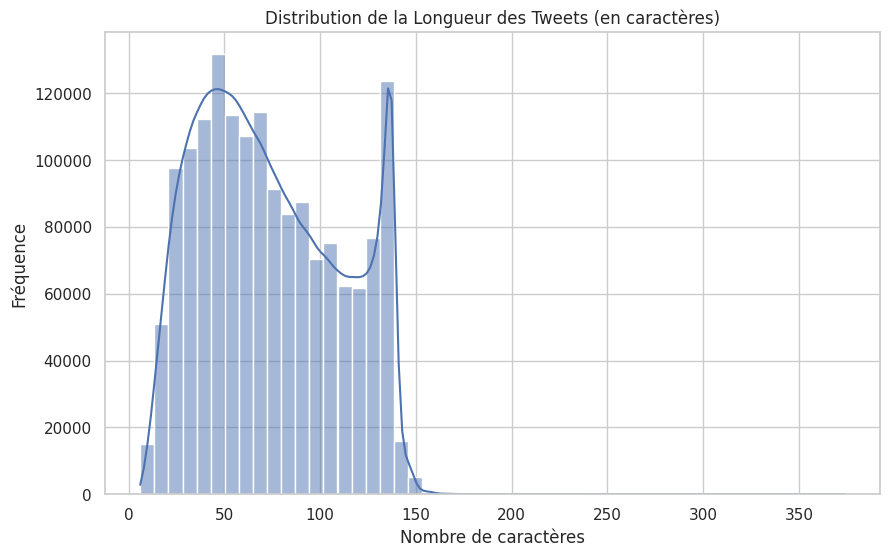



Exemples de Tweets Négatifs (target=0):
["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D", "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds', 'my whole body feels itchy and like its on fire ', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "]

Exemples de Tweets Positifs (target=1):
['I LOVE @Health4UandPets u guys r the best!! ', 'im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!', '@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. ', 'Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup', '@LovesBrooklyn2 he has that effect on everyone '

In [13]:
# 1. Simplifier la colonne 'target' (Mapper 4 -> 1)
# Crée une copie pour éviter le SettingWithCopyWarning
df_processed = df.copy()
df_processed['target'] = df_processed['target'].replace(4, 1)

# Vérifier le changement
print("Distribution de la nouvelle variable 'target' (0=Négatif, 1=Positif):")
print(df_processed['target'].value_counts())

print("\n" + "="*50 + "\n")

# 2. Supprimer les colonnes inutiles
columns_to_drop = ['id', 'date', 'flag', 'user']
df_processed = df_processed.drop(columns=columns_to_drop)

print("Colonnes après suppression:")
print(df_processed.columns)
print(f"Nouvelle forme du DataFrame: {df_processed.shape}")

print("\n" + "="*50 + "\n")

# 3. Analyser la longueur des tweets
df_processed['text_length'] = df_processed['text'].apply(len)

print("Statistiques descriptives de la longueur des tweets:")
print(df_processed['text_length'].describe())

# Visualiser la distribution de la longueur des tweets
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['text_length'], bins=50, kde=True)
plt.title('Distribution de la Longueur des Tweets (en caractères)')
plt.xlabel('Nombre de caractères')
plt.ylabel('Fréquence')
plt.show()

print("\n" + "="*50 + "\n")

# 4. Afficher quelques exemples de tweets
print("Exemples de Tweets Négatifs (target=0):")
print(df_processed[df_processed['target'] == 0]['text'].head().tolist())

print("\nExemples de Tweets Positifs (target=1):")
print(df_processed[df_processed['target'] == 1]['text'].head().tolist())

# Optionnel: Supprimer la colonne de longueur si non nécessaire plus tard
# df_processed = df_processed.drop(columns=['text_length'])

In [36]:
# --- Adaptez IMPÉRATIVEMENT le chemin source et le nom du fichier ! ---
# Chemin source : où se trouve votre notebook sur Google Drive
# VÉRIFIEZ BIEN CE CHEMIN DANS LE PANNEAU FICHIERS DE COLAB
source_notebook_path = '/content/drive/MyDrive/Colab Notebooks/OC/P7/Notebook de modélisation.ipynb'

# Chemin destination : le dossier actuel '/content/OC/'
destination_path = '/content/OC/' # Ou juste '.' car c'est le dossier courant

# Copie du fichier
!cp "{source_notebook_path}" "{destination_path}"

print(f"Vérification : contenu du dossier après copie :")
!ls

Vérification : contenu du dossier après copie :
'Notebook de modélisation.ipynb'


In [37]:
!git status

On branch main

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	"Notebook de mod\303\251lisation.ipynb"

nothing added to commit but untracked files present (use "git add" to track)


In [39]:
!git add Notebook de mod\303\251lisation.ipynb

fatal: pathspec 'Notebook' did not match any files


# Phase 2 : Modélisation - Approche 1 "Modèle sur mesure simple"

# Phase 3 : Modélisation - Approche 2 "Modèle sur mesure avancé" (Deep Learning)

# Phase 4 : Modélisation - Approche 3 "Modèle avancé BERT"